<a href="https://colab.research.google.com/github/desvirayas29/Export-Data-Android-To-Excel/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing Data

Repairing Missing Data

In [16]:
#importing packages and creating data
import pandas as pd
import numpy as np
data = pd.DataFrame([[1,2,np.nan], [np.nan,2,np.nan],
                     [3,np.nan,np.nan], [np.nan,3,8],
                     [5,3,np.nan]],columns=['A','B','C'])

In [25]:
print(data, '\n') #prints the data
# counts NaN values for each features
print(data.isnull().sum(axis = 0))

     A    B  missing_B
0  1.0  2.0          0
1  2.0  2.0          0
2  3.0  2.5          1
3  4.0  3.0          0
4  5.0  3.0          0 

A            0
B            0
missing_B    0
dtype: int64


In [20]:
#drops definitely C from the dataset
data.drop('C', axis = 1, inplace = True)
print(data)

     A    B
0  1.0  2.0
1  NaN  2.0
2  3.0  NaN
3  NaN  3.0
4  5.0  3.0


In [21]:
#creates a placeholder for B's missing values
data['missing_B'] = data['B'].isnull().astype(int)
print(data)

     A    B  missing_B
0  1.0  2.0          0
1  NaN  2.0          0
2  3.0  NaN          1
3  NaN  3.0          0
4  5.0  3.0          0


In [23]:
#fills missings in B using B's average
data['B'].fillna(data['B'].mean(), inplace = True)
print(data)

     A    B  missing_B
0  1.0  2.0          0
1  NaN  2.0          0
2  3.0  2.5          1
3  NaN  3.0          0
4  5.0  3.0          0


In [24]:
#interpolates A
data['A'].interpolate(method = 'linear', inplace = True)
print(data)

     A    B  missing_B
0  1.0  2.0          0
1  2.0  2.0          0
2  3.0  2.5          1
3  4.0  3.0          0
4  5.0  3.0          0


In [26]:
#we replicate data and missing value handling
#as before but for feature B
data = pd.DataFrame([[1,2,np.nan],[np.nan,2,np.nan],
                     [3,np.nan,np.nan],[np.nan,3,8],
                     [5,3,np.nan]],columns=['A','B','C'])
print(data)

     A    B    C
0  1.0  2.0  NaN
1  NaN  2.0  NaN
2  3.0  NaN  NaN
3  NaN  3.0  8.0
4  5.0  3.0  NaN


In [28]:
data.drop('C', axis = 1, inplace = True)
data['missing_B'] = data['B'].isnull().astype(int)
data['A'].interpolate(method = 'linear', inplace = True)
#here we handle feature B using a mode instead of an average
data['B'].fillna(data['B'].mode().iloc[0], inplace = True)
print(data)

     A    B  missing_B
0  1.0  2.0          0
1  2.0  2.0          0
2  3.0  2.0          1
3  4.0  3.0          0
4  5.0  3.0          0


Delimiting Anomalous Data

Univariate Model

In [31]:
#import dataset on housing
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
X = housing.data
y = housing.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [11]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [12]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


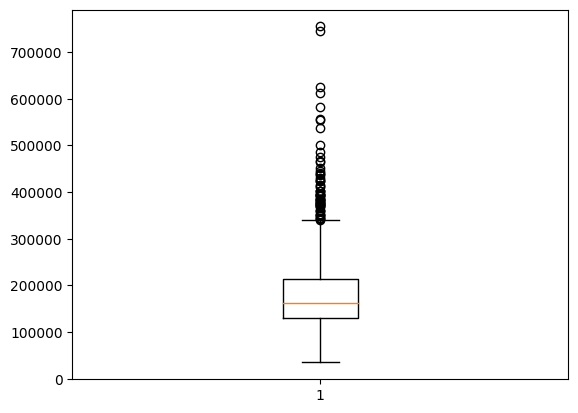

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(y)
plt.show()

Multivariate Models

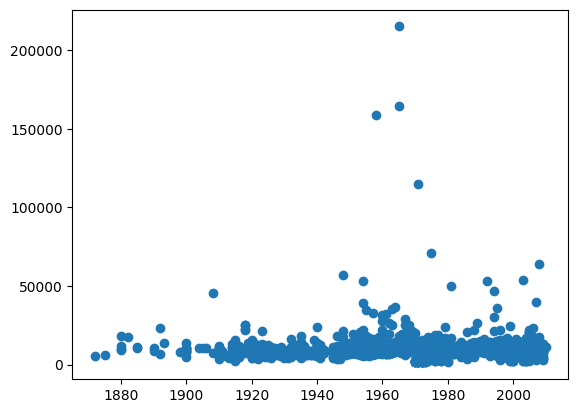

In [14]:
%matplotlib inline
plt.scatter(data = X, x = 'YearBuilt', y = 'LotArea')
plt.show()